In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_excel("electronic-store-sales-details.xls")


In [4]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Laptops,Dell,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Laptops,HP,"Hon Deluxe Fabric Upholstered Stacking HP, Rou...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Mobile Phones,HTC,Self-Adhesive Address HTC for Typewriters by U...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Laptops,Lenovo,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Mobile Phones,OnePlus,Eldon Fold 'N Roll CLG System,22.3680,2,0.20,2.5164


#### Let us see quarter sales

In [5]:
# Group data to qaurter sales 
quarter_sales =  df.set_index("Order Date").groupby([pd.Grouper(freq="Q"), 'Sales']).sum().reset_index()
quarter_sales.head()

,Order Date,Sales,Row ID,Postal Code,Quantity,Discount,Profit
0,2016-03-31,1.272,2347,78207,2,0.8,-2.1624
1,2016-03-31,1.344,3767,77036,1,0.2,0.5040
2,2016-03-31,1.728,8926,61107,3,0.8,-2.6784
3,2016-03-31,1.728,8983,60623,4,0.8,-2.7648
4,2016-03-31,2.043,8444,19120,1,0.7,-1.4982


In [6]:
quarter_sales = quarter_sales[['Order Date', 'Sales']]
quarter_sales

,Order Date,Sales
0,2016-03-31,1.272
1,2016-03-31,1.344
2,2016-03-31,1.728
3,2016-03-31,1.728
4,2016-03-31,2.043
...,...,...
9305,2019-12-31,2625.120
9306,2019-12-31,2676.672
9307,2019-12-31,4404.900
9308,2019-12-31,4643.800


In [7]:
quarter_sales = quarter_sales.groupby(["Order Date"]).sum()
quarter_sales

,Sales
Order Date,
2016-03-31,92369.1410
2016-06-30,134586.0130
2016-09-30,137277.6242
2016-12-31,229642.8178
2017-03-31,118041.0552
2017-06-30,130551.0360
2017-09-30,190216.9160
2017-12-31,273487.9340
2018-03-31,74231.8280


<AxesSubplot:xlabel='Order Date'>

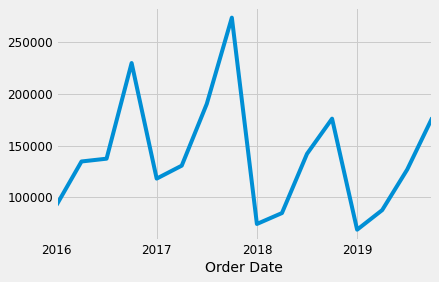

In [8]:
quarter_sales['Sales'].plot()

In [9]:
quarter_sales.to_csv('quarter_sales.csv')

#### Time Series Analyses

In [10]:
# Import data as a series
quarter_sales = pd.read_csv('quarter_sales.csv', index_col=[0], parse_dates=True,squeeze=True)

In [11]:
quarter_sales

Order Date
2016-03-31     92369.1410
2016-06-30    134586.0130
2016-09-30    137277.6242
2016-12-31    229642.8178
2017-03-31    118041.0552
2017-06-30    130551.0360
2017-09-30    190216.9160
2017-12-31    273487.9340
2018-03-31     74231.8280
2018-06-30     84780.2736
2018-09-30    141973.0323
2018-12-31    175924.5922
2019-03-31     68708.7906
2019-06-30     87625.8250
2019-09-30    126847.5072
2019-12-31    176913.2982
Name: Sales, dtype: float64

In [12]:
type(quarter_sales)

pandas.core.series.Series

#### Time Series Decomposition
##### Additive Model
##### Y(t) = Trendt(t) + Seosonality + Residual(t)

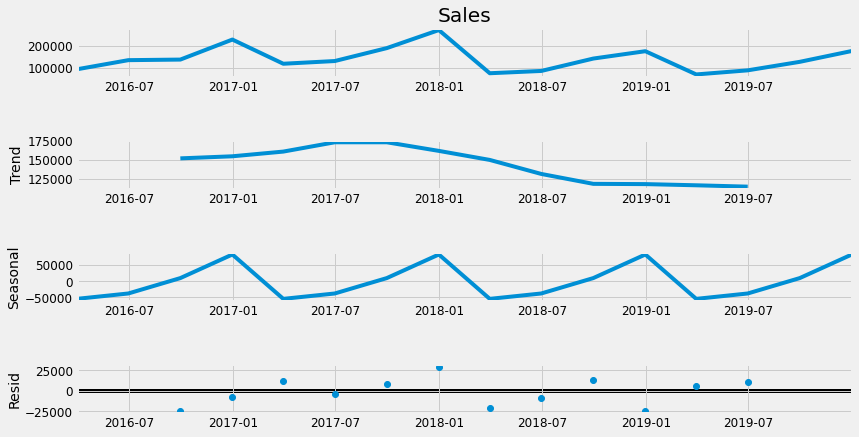

In [13]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(quarter_sales, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14,7)
plt.show()

#### From the figure above, we see the seasonality of data. Sales increase from quarter one to quarter four for each year.

#### Now I am going to perform time series analysis for one single product category 

In [14]:
# Laptop sales
laptops = df.loc[df['Category'] == 'Laptops']

In [15]:
# see tha dataframe columns
laptops.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [16]:
# let us see if we have a  4-year laptop sales data.
laptops['Order Date'].min(), laptops['Order Date'].max()

(Timestamp('2016-01-02 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [17]:
# remove columns we do not need, check missing values.
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
laptops.drop(cols, axis=1, inplace=True)
laptops = laptops.sort_values('Order Date')
laptops.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [18]:
# Aggregate sales by date
laptops = laptops.groupby('Order Date')['Sales'].sum().reset_index()
laptops

,Order Date,Sales
0,2016-01-02,173.9400
1,2016-01-03,1592.8500
2,2016-01-07,23.0760
3,2016-01-08,1565.8800
4,2016-01-09,15.1680
...,...,...
884,2019-12-24,1563.9940
885,2019-12-25,1433.5640
886,2019-12-26,326.6460
887,2019-12-27,2477.9032


In [19]:
# Indexing with time series data 
laptops = laptops.set_index('Order Date')


In [20]:
# We'll use that month's average  sales value and the start of each month as a timestamp.
y = laptops['Sales'].resample('MS').mean()

In [21]:
# Have a look at laptop sales data.
y

Order Date
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
2018-01-01     480.194231
2018-02-01     367.931600
2018-03-01     857.291529
2018-04-01     567.488357
2018-05-01     432.049187
2018-06-01     695.059242
2018-07-01     601.169500
2018-08-01     457.521656
2018-09-01     992.353367
2018-10-01     769.015437
2018-11-01     980.221486
2018-12-01    1532.298325
2019-01-01     978.328467
2019-02-01     522.395667
2

#### Time series forecasting with ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data

In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
#  Find the optimal set of parameters that yields the best performance for our model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:784.7193402038781


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2352.753164303118
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:494.3992953188407
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:488.67141883536607
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:691.9979290271854


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1620.0098630024459
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:490.3248020545097
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:490.6594622244675
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:749.4524888275437


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2408.448885904002
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:496.38268568259764
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:490.57689879303416
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:691.2894153096306


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2025.6575221517578
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:492.31432048324154
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:492.56683539756756
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:693.8573322214916


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1635.3259302957747
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:504.1598647761652
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:496.2502447180673
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:679.663419371077


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2069.805745184463
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:500.3951742490163
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:498.21909056447146
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:679.7989780870553


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1678.7264372455693
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:486.92498899855354
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:482.00274523262425
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:654.4029869121542


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1907.7488278384578
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:483.2479637560254
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:483.9581746213842
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:709.6585950311545


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2049.0047453430284
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:496.3905760521465
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:490.5683246798095
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:687.5153626218557
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2059.0240829448417
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:492.31350032056895
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:492.5592471929835
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:697.703609285904


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2190.297847439626
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:496.58935583768243
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:491.0758389489714
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:671.4682517250444


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1947.1764178822382
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:492.35703863127816
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:493.07583896401184
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:687.2038648124554


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1988.8382022822059
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:496.86827007801446
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:489.4086172270888
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:669.7937989890936


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2306.731273893883
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:492.1175577449137
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:491.3500185134123
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:678.9660879233098


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1468.2823882256098
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:488.92392682819747
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:483.7620850764095
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:656.238910168991


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2090.8156755033647
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:485.2415079899136
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:485.73150877510983


#### The above output suggests that SARIMAX(0, 1, 1)x(0, 1, 1, 12)  yields the lowest AIC value of  482.001. Therefore we should consider this to be optimal option.


In [24]:
# fittina the model 
mod = sm.tsa.statespace.SARIMAX(y,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12),enforce_invertibility=False)
results = mod.fit()


#### model diagnostics 

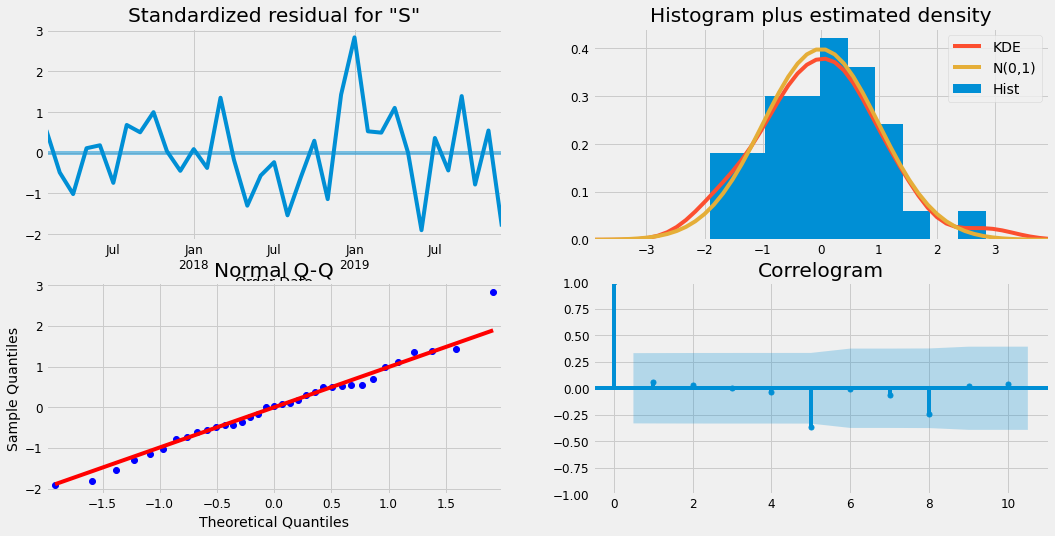

In [25]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

#### Model diagnostics suggests that the model residuals are near normally distributed.

#### To validate forecasting we compare predicted sales to real sales of the time series, and we set forecasts to start at 2019–01–01 to the end of the data.

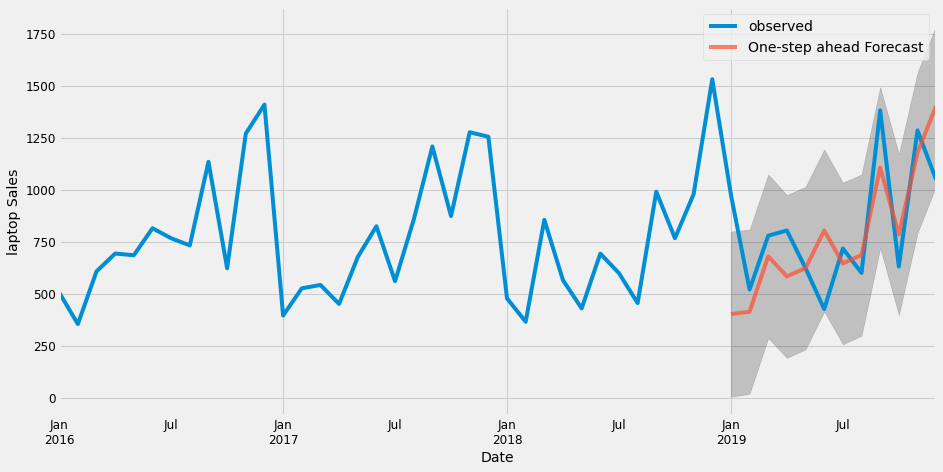

In [26]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('laptop Sales')
plt.legend()
plt.show()

#### Overall, our forecasts align with the true values, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year

In [27]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 65939.98


In [28]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 256.79


#### (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 256.79 of the real sales.

#### Forecasting and visualizing forecasts for the next two years

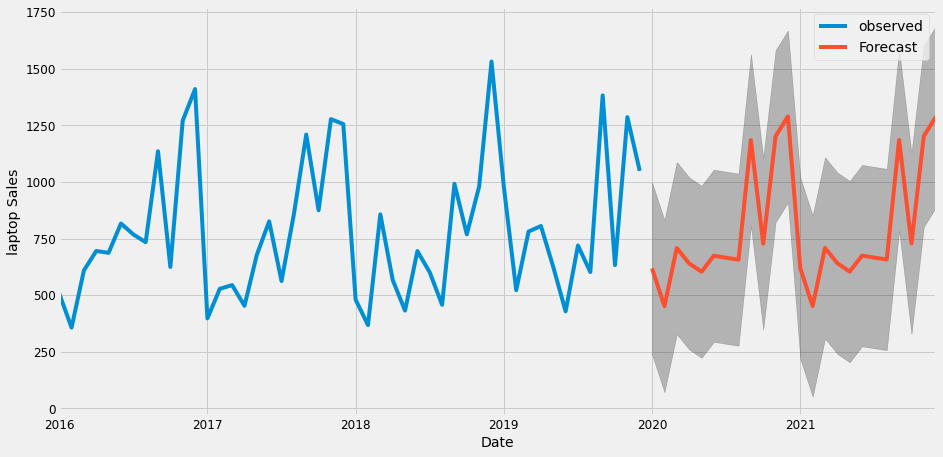

In [29]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('laptop Sales')
plt.legend()
plt.show()